In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'C:\Users\surya\OneDrive\Desktop\titanic.csv')

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.shape

(891, 12)

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
## Exploratory Data Analysis

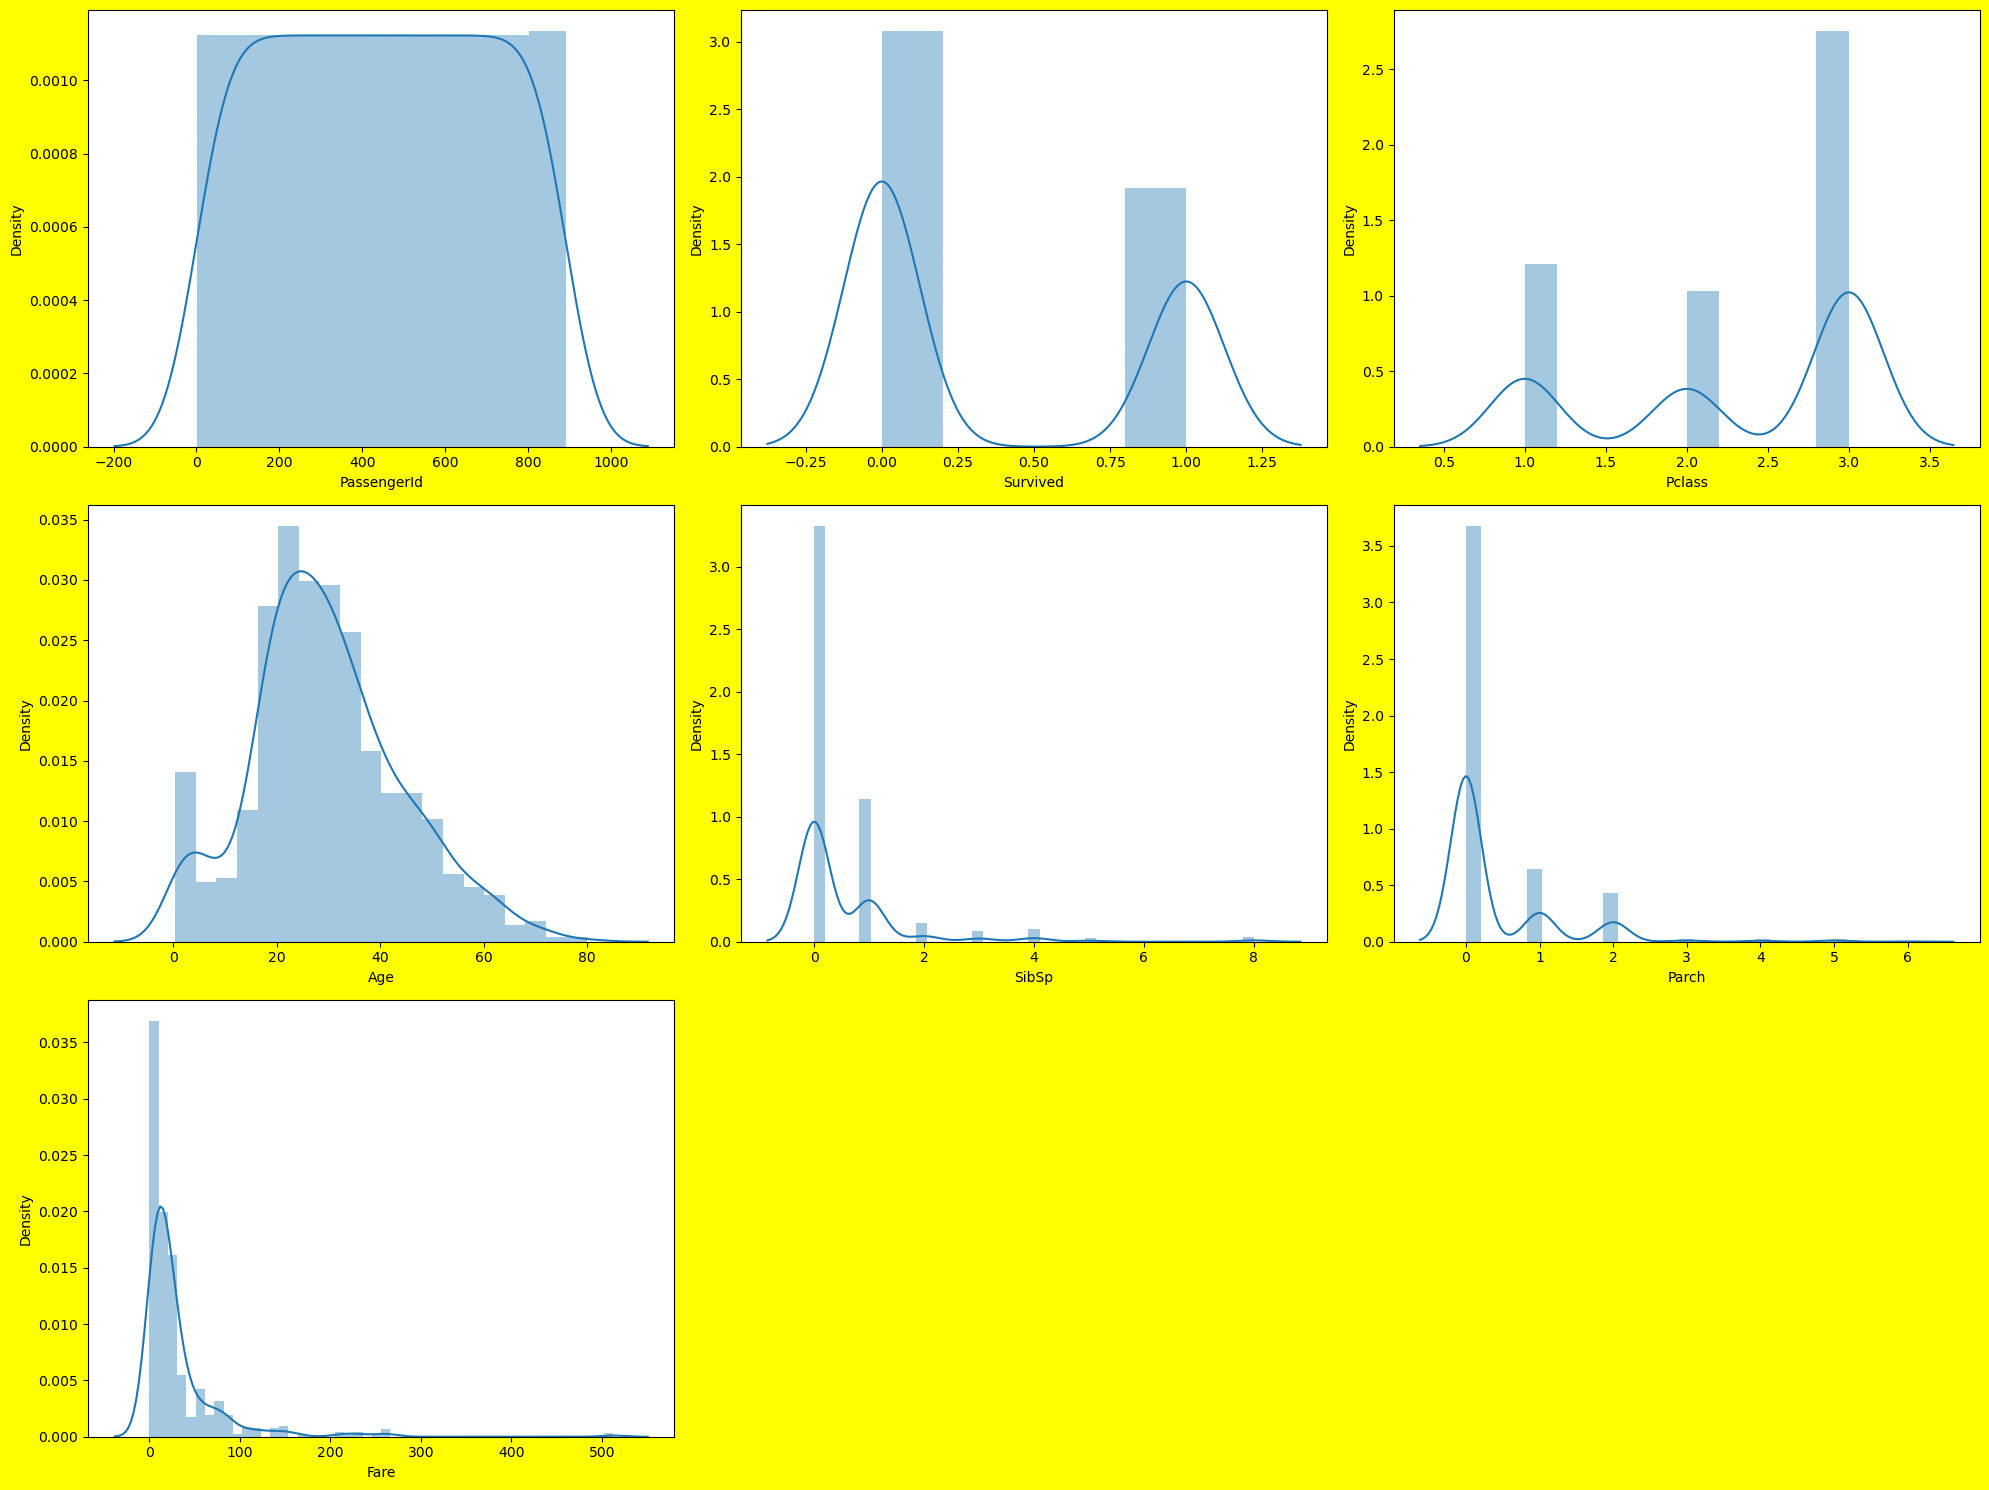

In [10]:
plt.figure(figsize=(20,15),facecolor='yellow')
graph=1
for column in data.select_dtypes(include=['int64', 'float64']):
    if graph <=9:  ## limited to the 9 graphs
        ax=plt.subplot(3,3,graph)
        sns.distplot(data[column])
        plt.xlabel(column)
    graph +=1
plt.tight_layout()

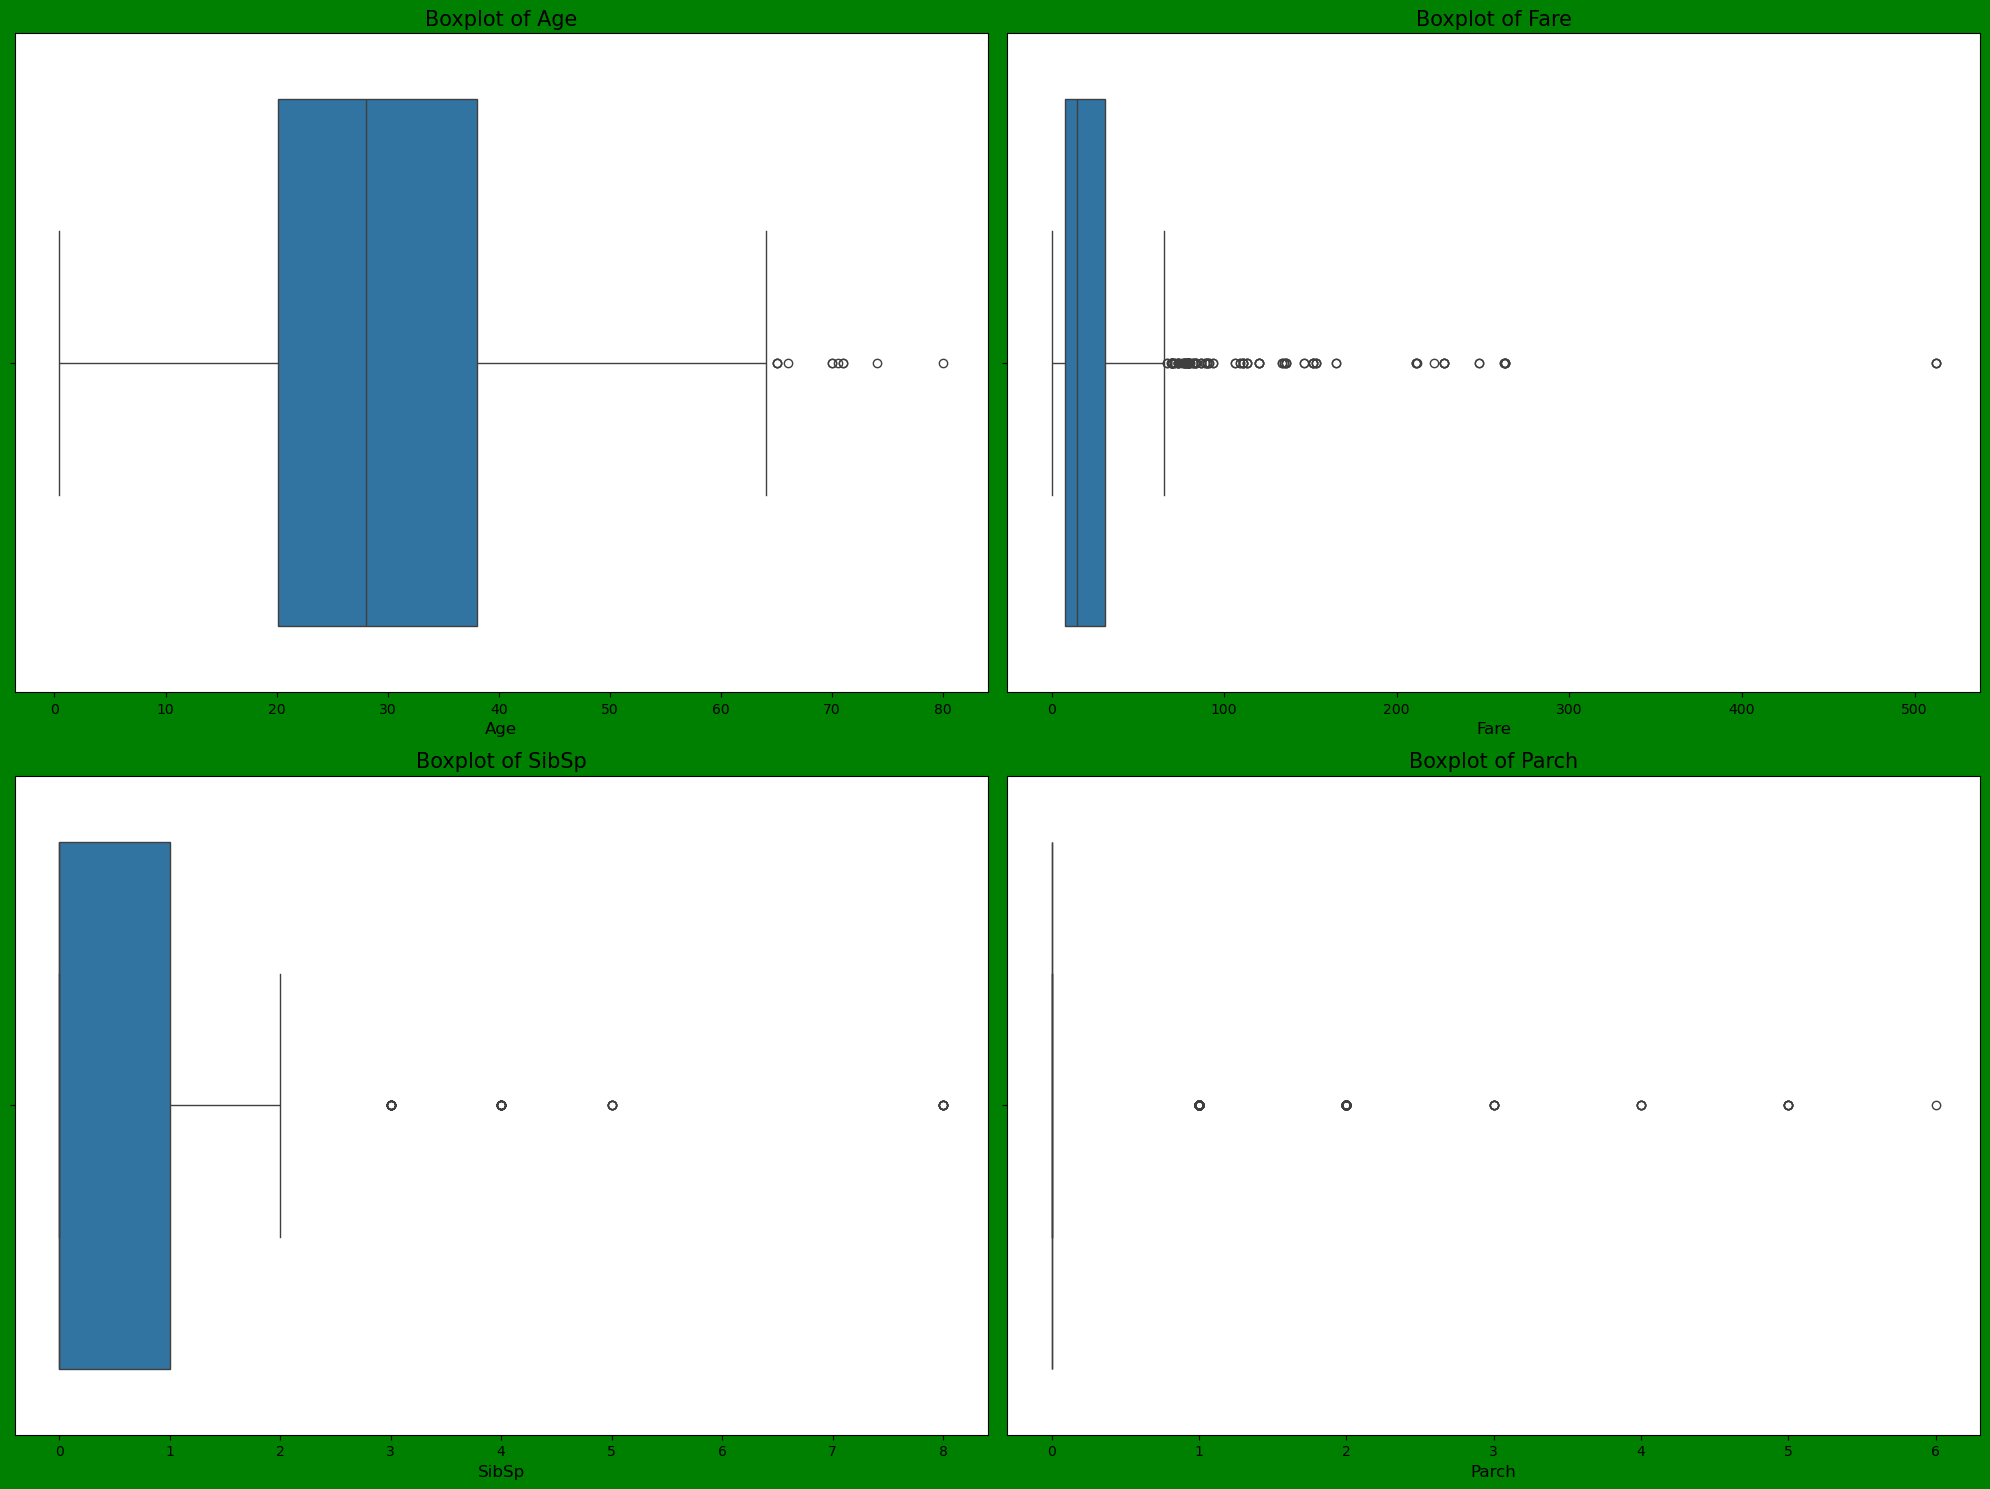

In [11]:
##Outliers
plt.figure(figsize=(20,15),facecolor='green')
columns_to_check = ['Age', 'Fare', 'SibSp', 'Parch']
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=data, x=column)
    plt.title(f'Boxplot of {column}', fontsize=15)
    plt.xlabel(column, fontsize=12)

plt.tight_layout()
plt.show()

In [12]:
##finding the correlation using heatmaps
corr_matrix=data.corr(numeric_only=True)
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


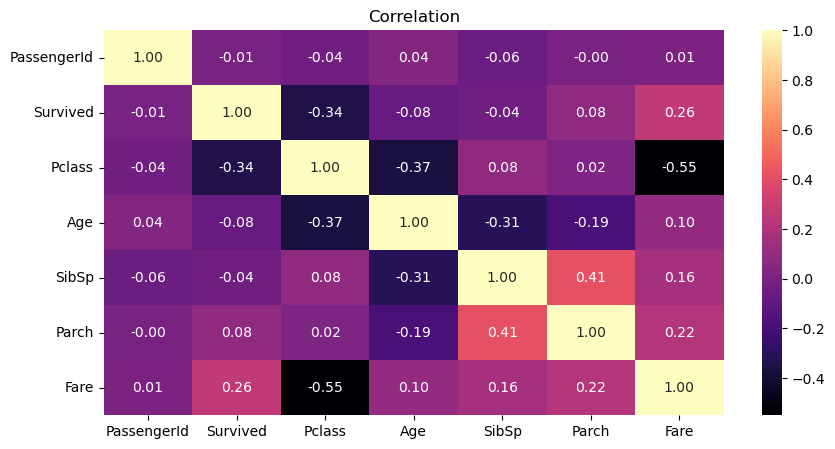

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True, cmap='magma', fmt='.2f')
plt.title('Correlation')
plt.show()

In [14]:
## Data Preprocessing

In [15]:
##filling the missing values
data['Age'].fillna(data['Age'].median(), inplace=True) ## to fill the missing Age values we took the median 
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True) ## the most frequent value is used to fill the missing value 

In [23]:
##dropping unnecessary columns such as PassengerId,Ticket and Cabin

In [17]:
data.drop(columns=['Name','PassengerId','Ticket','Cabin'], inplace= True)

In [18]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [19]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [20]:
## Outlier Handling
data = data[(np.abs(stats.zscore(data[['Age', 'Fare']])) < 3).all(axis=1)]

In [21]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [22]:
##Labeling
label_encoder = LabelEncoder()

# Apply label encoding to 'Sex' and 'Embarked'
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

In [23]:
data.shape

(864, 8)

In [24]:
## Test-Train Split
X= data.drop('Survived', axis=1) # features
y = data['Survived'] # targets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Structure of the training sets and test sets \n")
X_train.shape,X_test.shape,y_train.shape,y_test.shape 

Structure of the training sets and test sets 



((691, 7), (173, 7), (691,), (173,))

In [32]:
## MODEL PREDICTION

In [33]:
#RandomForestClassifier

In [25]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf),'\n','-'*100)
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7745664739884393 
 ----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       100
           1       0.74      0.73      0.73        73

    accuracy                           0.77       173
   macro avg       0.77      0.77      0.77       173
weighted avg       0.77      0.77      0.77       173



In [26]:
train_accuracy = rf_model.score(X_train, y_train)
test_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 98.26%
Test Accuracy: 77.46%


In [27]:
confusionmat = confusion_matrix(y_test,y_pred_rf)

In [28]:
print("Confusion matrix:", confusionmat)

Confusion matrix: [[81 19]
 [20 53]]


In [29]:
## K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn),'\n','-'*100)
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.6878612716763006 
 ----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.80      0.75       100
           1       0.66      0.53      0.59        73

    accuracy                           0.69       173
   macro avg       0.68      0.67      0.67       173
weighted avg       0.68      0.69      0.68       173



In [30]:
# SVC - Support Vector Classifier
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc),'\n','-'*100)
print(classification_report(y_test, y_pred_svc))

SVC Accuracy: 0.653179190751445 
 ----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.63      0.95      0.76       100
           1       0.78      0.25      0.38        73

    accuracy                           0.65       173
   macro avg       0.71      0.60      0.57       173
weighted avg       0.70      0.65      0.60       173



In [31]:
param_grid ={'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='accuracy',
                           n_jobs=-1, 
                           verbose=2)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [37]:
print("Best Parameters for Random Forest:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Accuracy Score: 0.8335210092795329


In [36]:
# Cross Validation

In [38]:
rf_cv = RandomForestClassifier(**grid_search.best_params_)
rf_cv = cross_val_score(rf_cv, X_train, y_train, cv=5) ## for random forest
rf_cv

array([0.8705036 , 0.83333333, 0.78985507, 0.78985507, 0.8115942 ])

In [39]:
print("Mean Cross-Validation Score:", np.mean(rf_cv))

Mean Cross-Validation Score: 0.8190282556563446


In [40]:
best_rf_model = grid_search.best_estimator_

# Training and test scores
train_score = best_rf_model.score(X_train, y_train)
test_score = best_rf_model.score(X_test, y_test)

print("Training Accuracy:", train_score *100)
print("Testing Accuracy:", test_score*100)

Training Accuracy: 91.31693198263386
Testing Accuracy: 80.92485549132948


In [42]:
with open('model.pkl','wb') as file:
    pickle.dump(best_rf_model, file)